<div class="alert alert-block alert-success">
    
# FIT5149 Assignment 1
#### Student Name: Muhammad Bilal Elahi
#### Student ID: 34200223
#### Group Number: 054
    
    
Date: 3/09/2024


Environment: Python 3.12.5

    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
$\;\;\;\;$[1.1. Background](#backg) <br>
$\;\;\;\;$[1.2. Objectives](#objectives) <br>
[2. Importing Libraries](#libs) <br>
$\;\;\;\;$[2.1. Mounting Google Drive](#mount_drive) <br>
[3. Examining Patent Files](#examine) <br>
$\;\;\;\;$[3.1. Input File Observations](#inp_obs) <br>
[4. Data Exploration and Preprocessing](#dep) <br>
$\;\;\;\;$[4.1. Reading File](#file_read) <br>
$\;\;\;\;$[4.2. Exploratory Analysis](#exp_analysis) <br>
$\;\;\;\;$[4.3. Outlier Removal](#outlier) <br>
[5. Feature Extraction](#feature_ext) <br>
$\;\;\;\;$[5.1. Creating Lagged Variables](#lagged) <br>
$\;\;\;\;$[5.2. Creating Features from Date](#date) <br>
$\;\;\;\;\;\;\;\;$[5.2.1 Creating Ordinal Features](#ordinal_date) <br>
$\;\;\;\;\;\;\;\;$[5.2.2 Creating Cyclic Features](#cyclic_date) <br>
$\;\;\;\;\;\;\;\;$[5.2.3 Creating Term End Features](#term_date) <br>
$\;\;\;\;$[5.3. Creating Binned Features](#json_veri) <br>
$\;\;\;\;$[5.4. Dropping Future Predictors](#json_veri) <br>
$\;\;\;\;$[5.5. Adding Transformed Features](#json_veri) <br>
[6. Feature Selection and Model Evaluation](#feature_sel) <br>
$\;\;\;\;$[6.1. Ridge Regression](#ridge) <br>
$\;\;\;\;\;\;\;\;$[6.1.1 Train-Test Split and Cross-Validation](#ridge_split) <br>
$\;\;\;\;\;\;\;\;$[6.1.2 Creating the Pipeline](#ridge_pipeline) <br>
$\;\;\;\;\;\;\;\;$[6.1.3 Plot RMSE Against Lambda](#ridge_graph) <br>
$\;\;\;\;\;\;\;\;$[6.1.4 Evaluate the Final Model on the Test Data](#ridge_eval) <br>
$\;\;\;\;\;\;\;\;$[6.1.5 Feature Importance](#ridge_feature) <br>
$\;\;\;\;$[6.2. Lasso Regression](#lasso) <br>
$\;\;\;\;\;\;\;\;$[6.2.1 Set Up the Pipeline](#lasso_pipeline) <br>
$\;\;\;\;\;\;\;\;$[6.2.2 Plot RMSE Against Lambda](#lasso_graph) <br>
$\;\;\;\;\;\;\;\;$[6.2.3 Evaluate the Final Model on the Test Data](#lasso_eval) <br>
$\;\;\;\;\;\;\;\;$[6.2.4 Feature Importance](#lasso_feature) <br>
$\;\;\;\;$[6.3. PCR](#pcr) <br>
$\;\;\;\;\;\;\;\;$[6.2.1 Set Up the Pipeline](#lasso_pipeline) <br>
$\;\;\;\;\;\;\;\;$[6.2.2 Plot RMSE Against Lambda](#lasso_graph) <br>
$\;\;\;\;\;\;\;\;$[6.2.3 Evaluate the Final Model on the Test Data](#lasso_eval) <br>
$\;\;\;\;\;\;\;\;$[6.2.4 Feature Importance](#lasso_feature) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

[1. Introduction](#Intro) <br>
$\;\;\;\;$[1.1. Background](#backg) <br>
$\;\;\;\;$[1.2. Objectives](#object) <br>
[2. Importing Libraries](#implib) <br>
[3. Data Exploration and Preprocessing](#dexpp) <br>
$\;\;\;\;$[3.1. Reading File](#file_read) <br>
$\;\;\;\;$[3.2. Exploratory Analysis](#exp_analysis) <br>
$\;\;\;\;$[3.3. Outlier Removal](#outlier) <br>


<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

<div class="alert alert-block alert-info">
    
### 1.1. Background <a class="anchor" id="backg"></a>


In the rapidly evolving financial markets, accurately predicting stock volatility is crucial for investors, portfolio managers, and financial institutions. Volatility, which measures the rate at which the price of a security increases or decreases for a given set of returns, is a key indicator of market sentiment and risk. Understanding and forecasting volatility allows for better risk management, informed decision-making, and the development of trading strategies that can mitigate potential losses. This assignment focuses on the development and evaluation of predictive models aimed at forecasting stock volatility using a combination of fundamental financial indicators and trading data. By leveraging various machine learning techniques, including Ridge Regression, Lasso Regression, and Principal Component Regression (PCR), the goal is to build a robust model that can generalize well across different stocks and market conditions.

<div class="alert alert-block alert-info">
    
### 1.2. Objectives <a class="anchor" name="object"></a>

The primary objectives of this assignment are:

**Data Exploration and Preprocessing:**

- To thoroughly explore the given dataset, identifying key features, patterns, and any potential data quality issues such as missing values or outliers.

- To perform feature engineering by creating lagged variables, rolling statistics, and other derived features that capture the temporal nature of the data and enhance the predictive power of the model.
- To preprocess the data by handling categorical variables, scaling numerical features, and preparing the data for model training.

**Model Development:**

- To develop and train multiple predictive models.

- To evaluate the models based on their ability to predict stock volatility, using appropriate metrics such as Root Mean Squared Error (RMSE) to quantify model accuracy.

**Model Comparison and Selection:**

- To compare the performance of the different models on both training and validation datasets, selecting the best-performing model based on RMSE and generalization ability.
 
- To analyze the importance of different features in the final model and interpret the results in the context of financial market predictions.

**Submission and Deployment:**

- To apply the selected model to a separate submission dataset, generating predictions for stock volatility and preparing a submission file.

- To ensure that the final model is robust, scalable, and capable of being deployed in a real-world financial setting for ongoing volatility prediction and risk management.

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="implib"></a>
 </div>

Here we will be importing all the libraries and packages used in our file to keep a track of them to avoid writing duplicate code of importing them.

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold

<div class="alert alert-block alert-warning"> 

## 3.  Data Exploration and Preprocessing <a class="anchor" id="dexpp"></a>

</div>

<div class="alert alert-block alert-info">
    
### 3.1. Reading File <a class="anchor" name="file_read"></a>

In this step we will reading the input file naming `A1_stock_volatility_labeled.csv` from our local repository.

In [2]:
# Load the datasets
data = pd.read_csv('A1_stock_volatility_labeled.csv')

# Submission Set
submission_data = pd.read_csv('A1_stock_volatility_submission.csv')

<div class="alert alert-block alert-info">
    
### 3.2. Exploratory analysis <a class="anchor" name="exp_analysis"></a>

- Now, let's start by displaying the first few rows of our dataset.

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
0,2022-01-01,164.634,144.954,165.074,136.849,40101533,5.732915e+09,148.347000,-12.188473,1.795721,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A


1. Dataset Overview:

- The dataset contains 22 columns and 13,486 rows.

- Date and Stock are categorical variables.
 
- Other columns are primarily numerical and represent various financial metrics and trading data

In [4]:
# Display the summary of the dataset
data.describe(include='all')

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
count,13486,13486.000000,13486.000000,13486.000000,13486.000000,1.348600e+04,1.348600e+04,13486.000000,13486.000000,13486.000000,...,1.348600e+04,13486.000000,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,13486
unique,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,613
top,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
mean,NaN,1741.328666,1735.367690,1829.655853,1637.911281,4.112382e+07,3.228092e+09,1733.197353,-0.700045,2.396125,...,2.857836e+09,1.949710,1.821612e+10,1.091715e+10,7.298849e+09,1.510022e+09,1.178012e+09,-7.025812e+08,-4.600039e+08,NaN
std,NaN,15564.852252,15628.651843,16210.989075,14950.536329,1.211088e+08,1.660591e+10,15573.457915,13.110310,2.033964,...,1.130077e+10,5.161378,5.717197e+10,3.217662e+10,2.944286e+10,7.989450e+09,5.928045e+09,3.328101e+09,3.485262e+09,NaN
min,NaN,0.011000,0.010000,0.011000,0.008000,4.210000e+02,1.746700e+04,0.010455,-84.347826,0.000000,...,-2.746000e+09,-84.600000,1.410000e+07,2.479000e+06,-8.940000e+09,4.300000e+04,-4.109000e+09,-7.097000e+10,-6.976000e+10,NaN
25%,NaN,22.710000,22.330000,24.750000,20.180000,3.879474e+06,1.125653e+08,22.486262,-6.911791,1.345456,...,1.013000e+08,-0.050000,7.990500e+08,3.497000e+08,2.705000e+08,5.024000e+07,5.240000e+05,-2.515500e+08,-2.350000e+08,NaN
50%,NaN,87.560000,86.645000,93.975000,81.372500,1.145391e+07,4.743543e+08,87.345952,-1.090276,1.980023,...,4.060000e+08,0.990000,2.858000e+09,1.556000e+09,9.840000e+08,1.861000e+08,8.319000e+07,-4.824000e+07,-2.264000e+07,NaN
75%,NaN,356.460000,352.652750,377.180000,325.060000,3.204557e+07,2.097197e+09,351.217239,4.979387,3.001239,...,1.422000e+09,2.860000,9.482000e+09,6.084000e+09,3.111000e+09,5.940000e+08,4.441500e+08,-6.422000e+06,7.465000e+06,NaN


2. First Few Rows of the Dataset:

- The dataset includes trading data such as Open, Close, High, Low prices, and Volume, as well as financial data such as Revenue, Net Income, Gross Profit, EPS, etc.

- The target variable for prediction is Volatility, which is a measure of price variability.

In [5]:
# Check for missing values
data.isnull().sum()

Date                         0
Open                         0
Close                        0
High                         0
Low                          0
Volume                       0
Amount                       0
Avg_Price                    0
Return                       0
Volatility                   0
Revenue                      0
Net Income                   0
Gross Profit                 0
EPS                          0
Total Assets                 0
Total Liabilities            0
Total Equity                 0
Cash and Cash Equivalents    0
Operating Cash Flow          0
Investing Cash Flow          0
Financing Cash Flow          0
Stock                        0
dtype: int64

3. Summary Statistics:

- The summary statistics provide an overview of the numerical data distribution.

- No missing values were detected in the dataset.

In [6]:
# Get the data types of each column
data.dtypes

Date                          object
Open                         float64
Close                        float64
High                         float64
Low                          float64
Volume                         int64
Amount                       float64
Avg_Price                    float64
Return                       float64
Volatility                   float64
Revenue                      float64
Net Income                   float64
Gross Profit                 float64
EPS                          float64
Total Assets                 float64
Total Liabilities            float64
Total Equity                 float64
Cash and Cash Equivalents    float64
Operating Cash Flow          float64
Investing Cash Flow          float64
Financing Cash Flow          float64
Stock                         object
dtype: object

4. Data Types:

- Most columns are float64, representing continuous numerical data.

- Date and Stock are object (categorical) types.

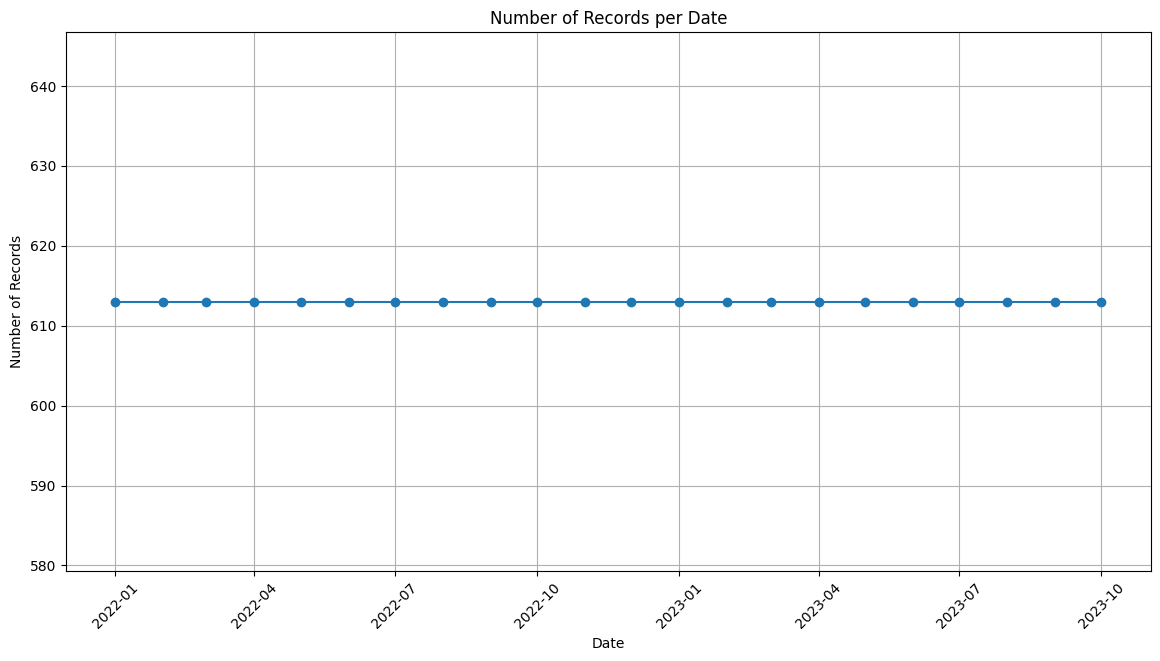

In [7]:
# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Explore the temporal nature of the data
# Group by Date to see if there is any pattern over time in terms of data availability
temporal_grouping = data.groupby('Date').size()

# Plot the temporal distribution
plt.figure(figsize=(14, 7))
plt.plot(temporal_grouping, marker='o')
plt.title('Number of Records per Date')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5. Temporal Distribution:

- It appears that the dataset is structured with consistent entries across each date, indicating regular updates (likely monthly).

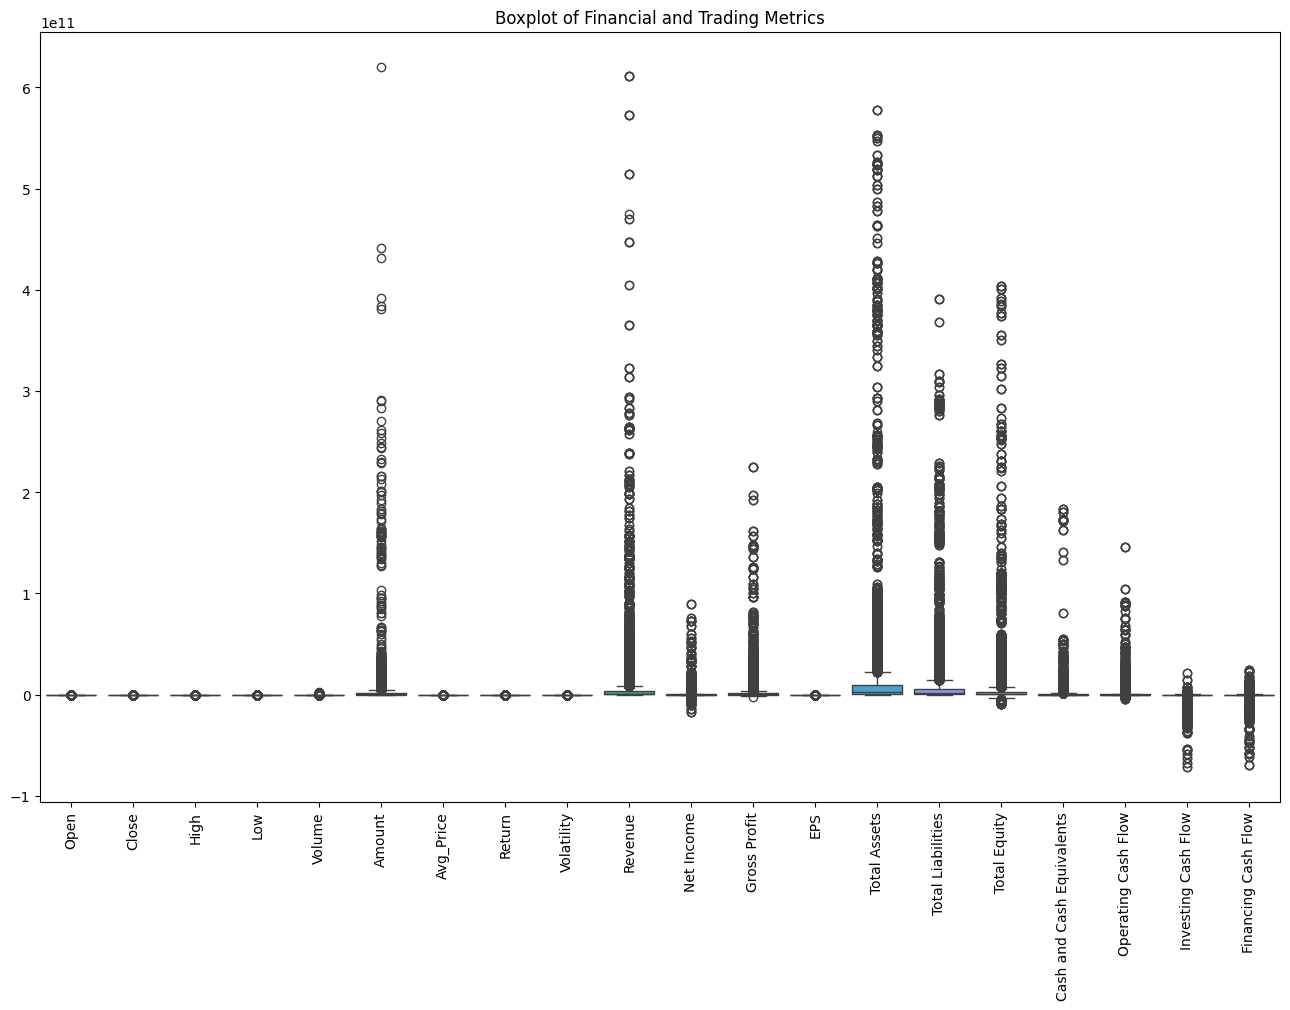

In [8]:
# Visualize the distributions of key financial and trading metrics to check for outliers and irregularities
plt.figure(figsize=(16, 10))
sns.boxplot(data=data.drop(columns=['Date', 'Stock']))
plt.title('Boxplot of Financial and Trading Metrics')
plt.xticks(rotation=90)
plt.show()

6. Outliers and Irregularities:

- The boxplot highlights potential outliers in several financial and trading metrics. Some features show significant variability.

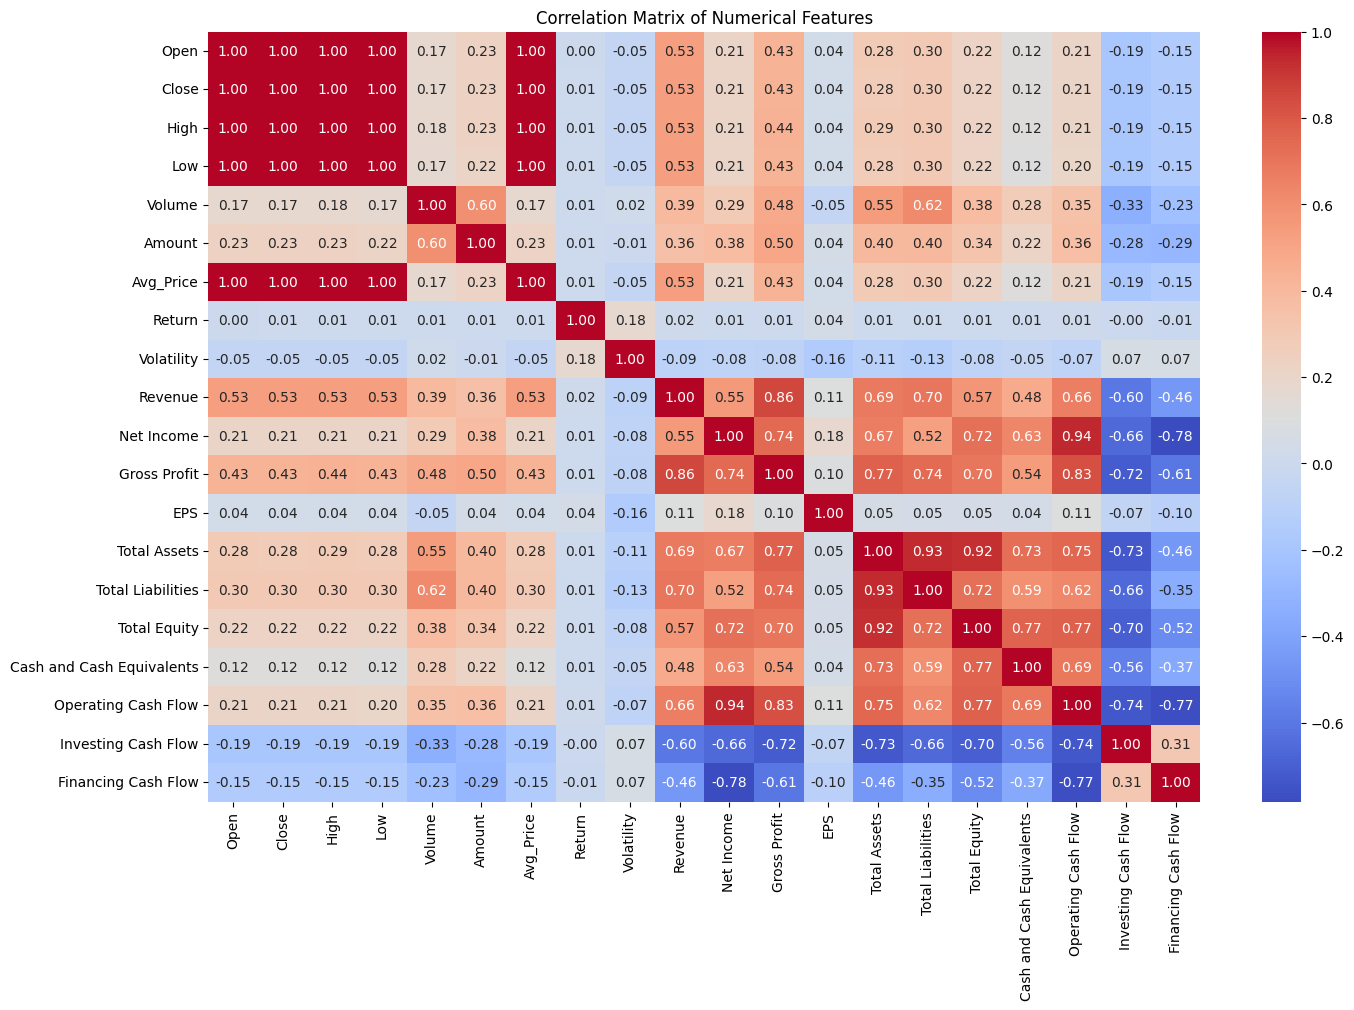

In [9]:
# Filter the DataFrame to include only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

7. Correlation Analysis:

- The heatmap of the correlation matrix reveals relationships between the various features.

 - Notable correlations:
    
    - Strong correlations among financial metrics such as Assests, Liabilities, and Total Equity.
    
    - Trading metrics such as Open, Close, High, Low, and Average Prices are also strongly correlated.

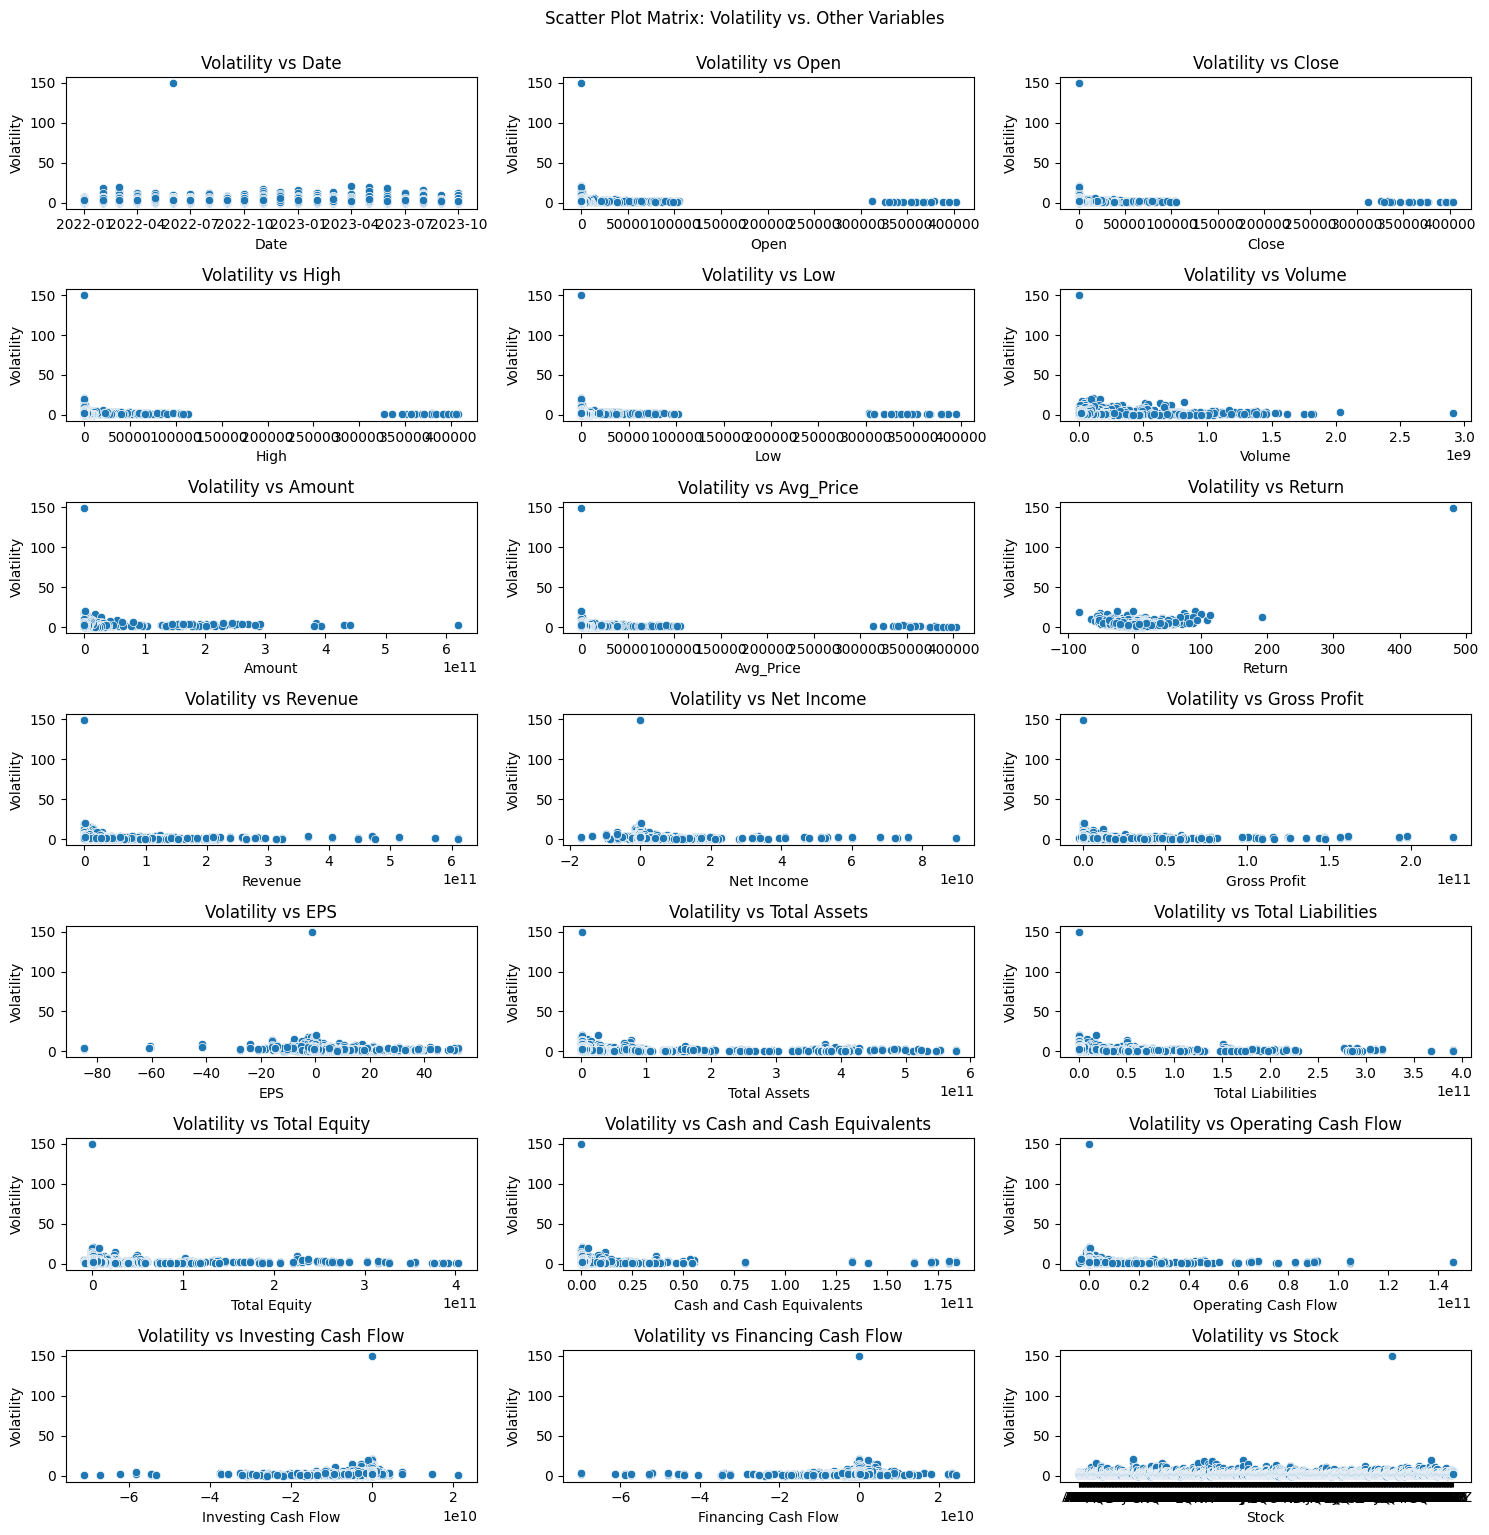

In [10]:
# Define the target variable
target_variable = 'Volatility'

# Filter the numerical columns excluding the target variable
numerical_columns = data.columns.drop(target_variable)

# Define the number of rows and columns for the grid
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate scatter plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=data[col], y=data[target_variable], ax=axes[i])
    axes[i].set_title(f'{target_variable} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_variable)

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Plot Matrix: Volatility vs. Other Variables', y=1.02)
plt.show()

A common trend of a single outlier for `volatility` can be noticed, having an extremely high value.

Let's focus on a single enhanced plot.

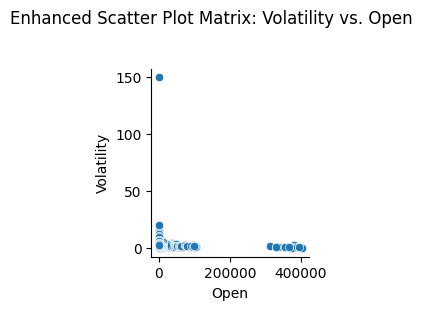

In [11]:
# Create a scatter plot matrix with 'Volatility' against all other variables, colored by 'Stock'
sns.pairplot(data, y_vars=['Volatility'], x_vars=['Open'], height=2.5)

# Adjust the plot for better readability
plt.suptitle('Enhanced Scatter Plot Matrix: Volatility vs. Open', y=1.2)
plt.show()

In [12]:
# Display summary statistics of the 'Volatility' column
data['Volatility'].describe()

count    13486.000000
mean         2.396125
std          2.033964
min          0.000000
25%          1.345456
50%          1.980023
75%          3.001239
max        149.476478
Name: Volatility, dtype: float64

- So, the max value `149.47` is much higher than the mean value of `2.39`. We should remove this outlier for better model predictions as this outlier will only skew the results.

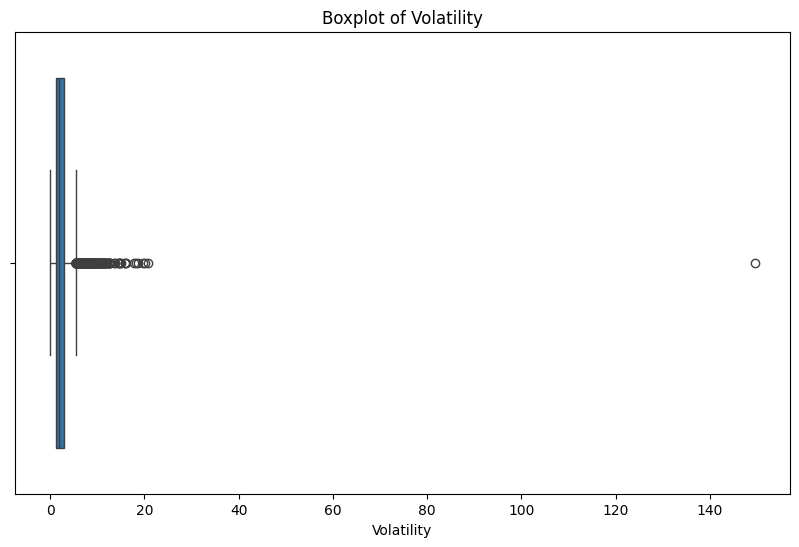

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Volatility'])
plt.title('Boxplot of Volatility')
plt.show()

<div class="alert alert-block alert-info">
    
### 3.3. Outlier Removal <a class="anchor" name="outlier"></a>

In [14]:
# Remove the outlier from the dataset
data_1 = data[data['Volatility'] <= 140]

# Check if the outlier has been removed
data_1['Volatility'].describe()

count    13485.000000
mean         2.385218
std          1.591502
min          0.000000
25%          1.345397
50%          1.979925
75%          3.000901
max         20.712825
Name: Volatility, dtype: float64

- Awesome! The outlier has been removed.

<div class="alert alert-block alert-warning"> 

## 4. Feature Extraction  <a class="anchor" name="feature_ext"></a>

</div>


<div class="alert alert-block alert-info">
    
### 4.1. Creating Lagged Variables <a class="anchor" name="lagged"></a>

Lagged variables are previous values of a time-series feature that can be used to predict future values. We will be creating lagged versions of features like Open, Close, High, Low, Volume, etc., to capture temporal dependencies.

In [15]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Creating lagged features for the trading data
lagged_features = ['Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return']

# Creating lag1 and lag2 features for each stock separately
for feature in lagged_features:
    # Creating lag2 (2 months back)
    data_1[f'{feature}_lag2'] = data_1.groupby('Stock')[feature].shift(2)

- Some rows with null values will be created for the as they don't contain the lagged information (The very first month when the data is being recorded).

In [16]:
# Drop rows with any NaN values
data_cleaned = data_1.dropna()

# Verify that all NaN values have been removed
nan_count_after = data_cleaned.isna().sum().sum()
print(f'Number of NaN values after cleaning: {nan_count_after}')

# Display the cleaned dataset
data_cleaned.head(30)

Number of NaN values after cleaning: 0


,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Financing Cash Flow,Stock,Open_lag2,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,Return_lag2
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,-5.460000e+08,A,164.634,144.954,165.074,136.849,4.010153e+07,5.732915e+09,148.347000,-12.188473
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,-6.690000e+08,A,146.164,135.994,150.734,128.694,4.231307e+07,5.677741e+09,141.947684,-6.181271
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,-6.690000e+08,A,136.464,137.964,145.834,132.534,4.625191e+07,6.205439e+09,139.889217,1.448593
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,-6.690000e+08,A,139.814,125.114,142.924,123.084,4.391692e+07,5.566595e+09,132.867500,-9.314024
6,2022-07-01,124.844,140.154,140.554,119.074,27261533,3.351761e+09,128.601000,12.470509,2.167925,...,-1.031000e+09,A,124.224,133.404,136.614,118.484,4.555196e+07,5.564296e+09,127.519238,6.625957
7,2022-08-01,139.564,134.304,155.054,133.209,32067005,4.305568e+09,139.247478,-4.173980,2.221199,...,-1.031000e+09,A,133.704,124.614,137.044,118.364,3.511024e+07,4.202306e+09,126.180190,-6.589008
8,2022-09-01,133.684,127.604,146.054,126.654,31680890,4.097576e+09,134.879714,-4.988682,1.642976,...,-1.031000e+09,A,124.844,140.154,140.554,119.074,2.726153e+07,3.351761e+09,128.601000,12.470509
9,2022-10-01,128.994,144.614,145.574,127.944,27011517,3.517686e+09,137.057810,13.330303,2.125559,...,-1.372000e+09,A,139.564,134.304,155.054,133.209,3.206700e+07,4.305568e+09,139.247478,-4.173980
10,2022-11-01,145.764,161.244,163.704,136.924,30724422,4.507027e+09,151.966381,11.499578,2.697177,...,-1.372000e+09,A,133.684,127.604,146.054,126.654,3.168089e+07,4.097576e+09,134.879714,-4.988682
11,2022-12-01,162.994,156.139,166.529,152.144,25282580,3.840781e+09,158.100905,-3.166009,1.378844,...,-1.372000e+09,A,128.994,144.614,145.574,127.944,2.701152e+07,3.517686e+09,137.057810,13.330303


#### Submission Set:

- We also need to add these lagged features in our submission set.

In [17]:
# Filter the training data for the specific dates
data_lag2 = data_cleaned[data_cleaned['Date'] == '2023-09-01']

# Set the index to 'Stock' for both datasets for easy lookup
data_lag2.set_index('Stock', inplace=True)

# Select the necessary columns for the lagged features
lagged_features = ['Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return']

# Set the index to 'Stock' for easy assignment in submission data
submission_data.set_index('Stock', inplace=True)

# Add lag1 (from 2023-10-01) and lag2 (from 2023-09-01) features to submission data
for feature in lagged_features:
    submission_data[f'{feature}_lag2'] = submission_data.index.map(data_lag2[feature])

# Reset the index in submission data after mapping
submission_data.reset_index(inplace=True)

In [18]:
submission_data.head()

,Stock,Date,Volatility,Open_lag2,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,Return_lag2
0,A,2023-11-01,0,129.629,118.759,130.619,115.939,39803880,4.538774e+09,120.66550,-7.226054
1,AAL,2023-11-01,0,6.378,5.636,6.393,5.520,538515882,7.218132e+09,5.86805,-11.272040
2,ABG,2023-11-01,0,234.035,231.995,236.925,220.225,3802931,8.595574e+08,227.26800,0.030182
3,ABT,2023-11-01,0,17679.040,16840.640,17728.832,16573.120,88119374,8.817397e+09,17255.68000,-4.396243
4,ACA,2023-11-01,0,79.890,72.850,80.330,72.720,4330653,3.219514e+08,75.47500,-7.982822



<div class="alert alert-block alert-info">
    
### 4.2. Creating Features from 'Date' <a class="anchor" name="date"></a>

<div class="alert alert-block alert-success">
    
#### 4.2.1.  Extracting Ordinal Features <a class="anchor" name="ordinal_date"></a>
    
</div>

Extracting features such as the month, quarter, and year from the Date column.

In [19]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Extracting month, quarter, and year from the Date column
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Quarter'] = data_cleaned['Date'].dt.quarter
data_cleaned['Year'] = data_cleaned['Date'].dt.year

In [20]:
data_cleaned.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,Return_lag2,Month,Quarter,Year
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,144.954,165.074,136.849,40101533.0,5.732915e+09,148.347000,-12.188473,3,1,2022
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,135.994,150.734,128.694,42313071.0,5.677741e+09,141.947684,-6.181271,4,2,2022
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,137.964,145.834,132.534,46251907.0,6.205439e+09,139.889217,1.448593,5,2,2022
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,125.114,142.924,123.084,43916920.0,5.566595e+09,132.867500,-9.314024,6,2,2022
6,2022-07-01,124.844,140.154,140.554,119.074,27261533,3.351761e+09,128.601000,12.470509,2.167925,...,133.404,136.614,118.484,45551962.0,5.564296e+09,127.519238,6.625957,7,3,2022


#### Submission Set:

In [21]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Convert Date to datetime format
submission_data['Date'] = pd.to_datetime(submission_data['Date'])

# Extracting month, quarter, and year from the Date column
submission_data['Month'] = submission_data['Date'].dt.month
submission_data['Quarter'] = submission_data['Date'].dt.quarter
submission_data['Year'] = submission_data['Date'].dt.year

submission_data.head()

,Stock,Date,Volatility,Open_lag2,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,Return_lag2,Month,Quarter,Year
0,A,2023-11-01,0,129.629,118.759,130.619,115.939,39803880,4.538774e+09,120.66550,-7.226054,11,4,2023
1,AAL,2023-11-01,0,6.378,5.636,6.393,5.520,538515882,7.218132e+09,5.86805,-11.272040,11,4,2023
2,ABG,2023-11-01,0,234.035,231.995,236.925,220.225,3802931,8.595574e+08,227.26800,0.030182,11,4,2023
3,ABT,2023-11-01,0,17679.040,16840.640,17728.832,16573.120,88119374,8.817397e+09,17255.68000,-4.396243,11,4,2023
4,ACA,2023-11-01,0,79.890,72.850,80.330,72.720,4330653,3.219514e+08,75.47500,-7.982822,11,4,2023


<div class="alert alert-block alert-success">
    
#### 4.2.2.  Creating Cyclical Features <a class="anchor" name="cyclic_date"></a>
    
</div>

To capture the cyclical nature of time (e.g., months of the year), we will convert the month into cyclical features using sine and cosine transformations. This is particularly useful when dealing with periodic patterns.

In [22]:
# Creating cyclical features for the month
data_cleaned['Month_sin'] = np.sin(2 * np.pi * data_cleaned['Month'] / 12)
data_cleaned['Month_cos'] = np.cos(2 * np.pi * data_cleaned['Month'] / 12)

# Similarly, we will create cyclical features for the quarter
data_cleaned['Quarter_sin'] = np.sin(2 * np.pi * data_cleaned['Quarter'] / 4)
data_cleaned['Quarter_cos'] = np.cos(2 * np.pi * data_cleaned['Quarter'] / 4)

In [23]:
data_cleaned.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Amount_lag2,Avg_Price_lag2,Return_lag2,Month,Quarter,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,5.732915e+09,148.347000,-12.188473,3,1,2022,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,5.677741e+09,141.947684,-6.181271,4,2,2022,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,6.205439e+09,139.889217,1.448593,5,2,2022,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,5.566595e+09,132.867500,-9.314024,6,2,2022,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
6,2022-07-01,124.844,140.154,140.554,119.074,27261533,3.351761e+09,128.601000,12.470509,2.167925,...,5.564296e+09,127.519238,6.625957,7,3,2022,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16


#### Submission Set:

In [24]:
# Creating cyclical features for the month
submission_data['Month_sin'] = np.sin(2 * np.pi * submission_data['Month'] / 12)
submission_data['Month_cos'] = np.cos(2 * np.pi * submission_data['Month'] / 12)

# Similarly, we will create cyclical features for the quarter
submission_data['Quarter_sin'] = np.sin(2 * np.pi * submission_data['Quarter'] / 4)
submission_data['Quarter_cos'] = np.cos(2 * np.pi * submission_data['Quarter'] / 4)

submission_data.head()

,Stock,Date,Volatility,Open_lag2,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,Return_lag2,Month,Quarter,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos
0,A,2023-11-01,0,129.629,118.759,130.619,115.939,39803880,4.538774e+09,120.66550,-7.226054,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
1,AAL,2023-11-01,0,6.378,5.636,6.393,5.520,538515882,7.218132e+09,5.86805,-11.272040,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
2,ABG,2023-11-01,0,234.035,231.995,236.925,220.225,3802931,8.595574e+08,227.26800,0.030182,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
3,ABT,2023-11-01,0,17679.040,16840.640,17728.832,16573.120,88119374,8.817397e+09,17255.68000,-4.396243,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
4,ACA,2023-11-01,0,79.890,72.850,80.330,72.720,4330653,3.219514e+08,75.47500,-7.982822,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0


<div class="alert alert-block alert-success">
    
#### 4.2.3.  Creating Term End Features <a class="anchor" name="term_date"></a>
    
</div>

Quarter ends typically occur in March, June, September, and December. We will create a binary feature that indicates whether a given date falls at the end of a quarter.

In [25]:
# Create the 'Is Quarter End' feature
data_cleaned['Is_Quarter_End'] = data_cleaned['Month'].isin([3, 6, 9, 12]).astype(int)

The fiscal year end is often at the end of December (Month 12), but this can vary depending on the company's fiscal year. For simplicity, let's assume the fiscal year ends in December.

In [26]:
# Create the 'Is Fiscal Year End' feature
data_cleaned['Is_Fiscal_Year_End'] = (data_cleaned['Month'] == 12).astype(int)

#### Submission Data:


In [27]:
# Create the 'Is Quarter End' feature
submission_data['Is_Quarter_End'] = submission_data['Month'].isin([3, 6, 9, 12]).astype(int)

# Create the 'Is Fiscal Year End' feature
submission_data['Is_Fiscal_Year_End'] = (submission_data['Month'] == 12).astype(int)

submission_data.head()

,Stock,Date,Volatility,Open_lag2,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,Return_lag2,Month,Quarter,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos,Is_Quarter_End,Is_Fiscal_Year_End
0,A,2023-11-01,0,129.629,118.759,130.619,115.939,39803880,4.538774e+09,120.66550,-7.226054,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
1,AAL,2023-11-01,0,6.378,5.636,6.393,5.520,538515882,7.218132e+09,5.86805,-11.272040,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
2,ABG,2023-11-01,0,234.035,231.995,236.925,220.225,3802931,8.595574e+08,227.26800,0.030182,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
3,ABT,2023-11-01,0,17679.040,16840.640,17728.832,16573.120,88119374,8.817397e+09,17255.68000,-4.396243,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
4,ACA,2023-11-01,0,79.890,72.850,80.330,72.720,4330653,3.219514e+08,75.47500,-7.982822,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0



<div class="alert alert-block alert-info">
    
### 4.3. Creating Binned Features <a class="anchor" name="binned"></a>

We will determine the company size by the amount of `Assets` owned by the company in three categories; Small, Medium, and Large.

In [28]:
# Example of creating bins using quantiles (percentiles)
bins = [data_cleaned['Total Assets'].min(), 
        data_cleaned['Total Assets'].quantile(0.33), 
        data_cleaned['Total Assets'].quantile(0.66), 
        data_cleaned['Total Assets'].max()]

# Labels for the bins
labels = ['Small', 'Medium', 'Large']

# Create the 'Company Size' feature
data_cleaned['Company_Size'] = pd.cut(data_cleaned['Total Assets'], bins=bins, labels=labels, include_lowest=True)


Similarly, we will categorize Revenue and Net Income.

In [29]:
# Binning Revenue into categories
bins = [data_cleaned['Revenue'].min(), 
        data_cleaned['Revenue'].quantile(0.33), 
        data_cleaned['Revenue'].quantile(0.66), 
        data_cleaned['Revenue'].max()]

labels = ['Low Revenue', 'Medium Revenue', 'High Revenue']

data_cleaned['Revenue_Category'] = pd.cut(data_cleaned['Revenue'], bins=bins, labels=labels, include_lowest=True)

# Binning Net Income into profitability categories
bins = [data_cleaned['Net Income'].min(), 
        0,  # Separate loss-making and profit-making companies
        data_cleaned['Net Income'].quantile(0.5), 
        data_cleaned['Net Income'].max()]

labels = ['Loss', 'Low Profit', 'High Profit']

data_cleaned['Profitability_Category'] = pd.cut(data_cleaned['Net Income'], bins=bins, labels=labels, include_lowest=True)


In [30]:
# Check the distribution of the new categorical features
print(data_cleaned['Company_Size'].value_counts())
print(data_cleaned['Revenue_Category'].value_counts())
print(data_cleaned['Profitability_Category'].value_counts())

# Display the first few rows of the updated dataset
data_cleaned.head()


Company_Size
Large     4166
Small     4049
Medium    4044
Name: count, dtype: int64
Revenue_Category
High Revenue      4168
Low Revenue       4046
Medium Revenue    4045
Name: count, dtype: int64
Profitability_Category
High Profit    6127
Loss           3205
Low Profit     2927
Name: count, dtype: int64


,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos,Is_Quarter_End,Is_Fiscal_Year_End,Company_Size,Revenue_Category,Profitability_Category
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,2022,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,1,0,Large,Medium Revenue,High Profit
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,2022,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00,0,0,Large,High Revenue,High Profit
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,2022,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,0,0,Large,High Revenue,High Profit
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,2022,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00,1,0,Large,High Revenue,High Profit
6,2022-07-01,124.844,140.154,140.554,119.074,27261533,3.351761e+09,128.601000,12.470509,2.167925,...,2022,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16,0,0,Large,High Revenue,High Profit


#### Submission Set:

- Notice that the features such as 'Revenue', 'Net Income', 'Gross Profit', etc., are either quarterly updated or annually. 

- In either case these features would be same as that in the labled set for the previous month October, as November is included in the same quarterly period.

In [31]:
# Filter the training data for the last available date (1/10/2023)
latest_quarter_data = data_cleaned[data_cleaned['Date'] == '2023-10-01']

# Set the index to 'Stock' for easy lookup
latest_quarter_data.set_index('Stock', inplace=True)

# Select the financial features that need to be updated in the submission dataset
financial_features = ['Revenue', 'Net Income', 'Gross Profit', 'EPS', 'Total Assets', 
                      'Total Liabilities', 'Total Equity', 'Cash and Cash Equivalents', 
                      'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow']

# Set the index to 'Stock' for easy assignment
submission_data.set_index('Stock', inplace=True)

# Update the submission dataset with the values from 1/10/2023
for feature in financial_features:
    submission_data[feature] = submission_data.index.map(latest_quarter_data[feature])

# Reset the index if necessary
submission_data.reset_index(inplace=True)

# Display the updated submission data to verify the changes
submission_data.head()


,Stock,Date,Volatility,Open_lag2,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,...,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
0,A,2023-11-01,0,129.629,118.759,130.619,115.939,39803880,4.538774e+09,120.66550,...,1.240000e+09,3.465000e+09,4.22,1.076000e+10,4.918000e+09,5.845000e+09,1.590000e+09,1.772000e+09,-3.100000e+08,-9.300000e+08
1,AAL,2023-11-01,0,6.378,5.636,6.393,5.520,538515882,7.218132e+09,5.86805,...,8.030000e+08,1.064000e+10,1.23,6.571000e+10,7.085000e+10,-5.136000e+09,5.770000e+08,5.154000e+09,-2.661000e+09,-2.392000e+09
2,ABG,2023-11-01,0,234.035,231.995,236.925,220.225,3802931,8.595574e+08,227.26800,...,5.470000e+08,2.083000e+09,26.02,8.255000e+09,5.007000e+09,3.249000e+09,4.160000e+07,2.398000e+08,-9.040000e+07,-3.431000e+08
3,ABT,2023-11-01,0,17679.040,16840.640,17728.832,16573.120,88119374,8.817397e+09,17255.68000,...,4.129000e+09,1.645000e+10,2.36,7.209000e+10,3.440000e+10,3.769000e+10,6.709000e+09,4.223000e+09,-2.309000e+09,-5.039000e+09
4,ACA,2023-11-01,0,79.890,72.850,80.330,72.720,4330653,3.219514e+08,75.47500,...,1.321000e+08,3.368000e+08,2.71,3.490000e+09,1.174000e+09,2.315000e+09,1.553000e+08,1.988000e+08,-1.315000e+08,-7.240000e+07


- Now let's create the binned features in our submission set.

In [32]:
# Example of creating bins using quantiles (percentiles)
bins = [submission_data['Total Assets'].min(), 
        submission_data['Total Assets'].quantile(0.33), 
        submission_data['Total Assets'].quantile(0.66), 
        submission_data['Total Assets'].max()]

# Labels for the bins
labels = ['Small', 'Medium', 'Large']

# Create the 'Company Size' feature
submission_data['Company_Size'] = pd.cut(submission_data['Total Assets'], bins=bins, labels=labels, include_lowest=True)

# Binning Revenue into categories
bins = [submission_data['Revenue'].min(), 
        submission_data['Revenue'].quantile(0.33), 
        submission_data['Revenue'].quantile(0.66), 
        submission_data['Revenue'].max()]

labels = ['Low Revenue', 'Medium Revenue', 'High Revenue']

data_cleaned['Revenue_Category'] = pd.cut(submission_data['Revenue'], bins=bins, labels=labels, include_lowest=True)

# Binning Net Income into profitability categories
bins = [submission_data['Net Income'].min(), 
        0,  # Separate loss-making and profit-making companies
        submission_data['Net Income'].quantile(0.5), 
        submission_data['Net Income'].max()]

labels = ['Loss', 'Low Profit', 'High Profit']

submission_data['Profitability_Category'] = pd.cut(submission_data['Net Income'], bins=bins, labels=labels, include_lowest=True)

submission_data.head()

,Stock,Date,Volatility,Open_lag2,Close_lag2,High_lag2,Low_lag2,Volume_lag2,Amount_lag2,Avg_Price_lag2,...,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Company_Size,Profitability_Category
0,A,2023-11-01,0,129.629,118.759,130.619,115.939,39803880,4.538774e+09,120.66550,...,4.22,1.076000e+10,4.918000e+09,5.845000e+09,1.590000e+09,1.772000e+09,-3.100000e+08,-9.300000e+08,Large,High Profit
1,AAL,2023-11-01,0,6.378,5.636,6.393,5.520,538515882,7.218132e+09,5.86805,...,1.23,6.571000e+10,7.085000e+10,-5.136000e+09,5.770000e+08,5.154000e+09,-2.661000e+09,-2.392000e+09,Large,High Profit
2,ABG,2023-11-01,0,234.035,231.995,236.925,220.225,3802931,8.595574e+08,227.26800,...,26.02,8.255000e+09,5.007000e+09,3.249000e+09,4.160000e+07,2.398000e+08,-9.040000e+07,-3.431000e+08,Large,High Profit
3,ABT,2023-11-01,0,17679.040,16840.640,17728.832,16573.120,88119374,8.817397e+09,17255.68000,...,2.36,7.209000e+10,3.440000e+10,3.769000e+10,6.709000e+09,4.223000e+09,-2.309000e+09,-5.039000e+09,Large,High Profit
4,ACA,2023-11-01,0,79.890,72.850,80.330,72.720,4330653,3.219514e+08,75.47500,...,2.71,3.490000e+09,1.174000e+09,2.315000e+09,1.553000e+08,1.988000e+08,-1.315000e+08,-7.240000e+07,Medium,High Profit



<div class="alert alert-block alert-info">
    
### 4.4. Dropping Future Predictors <a class="anchor" name="future"></a>

The columns `Open`, `Close`, `High`, etc., rely on the future predictive data that may not be available to predict volatility for the next month, so we will drop them. We will also drop the `Date` column as it is redundant now.

In [33]:
# List of columns to drop
columns_to_drop = ['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return']  # Replace with your column names

# Drop the specified columns
data_selected = data_cleaned.drop(columns=columns_to_drop)

# Drop Date in Submission Data
submission_data = submission_data.drop(columns=['Date'])

- Now let's check the correlation matrix for our newly generated features.

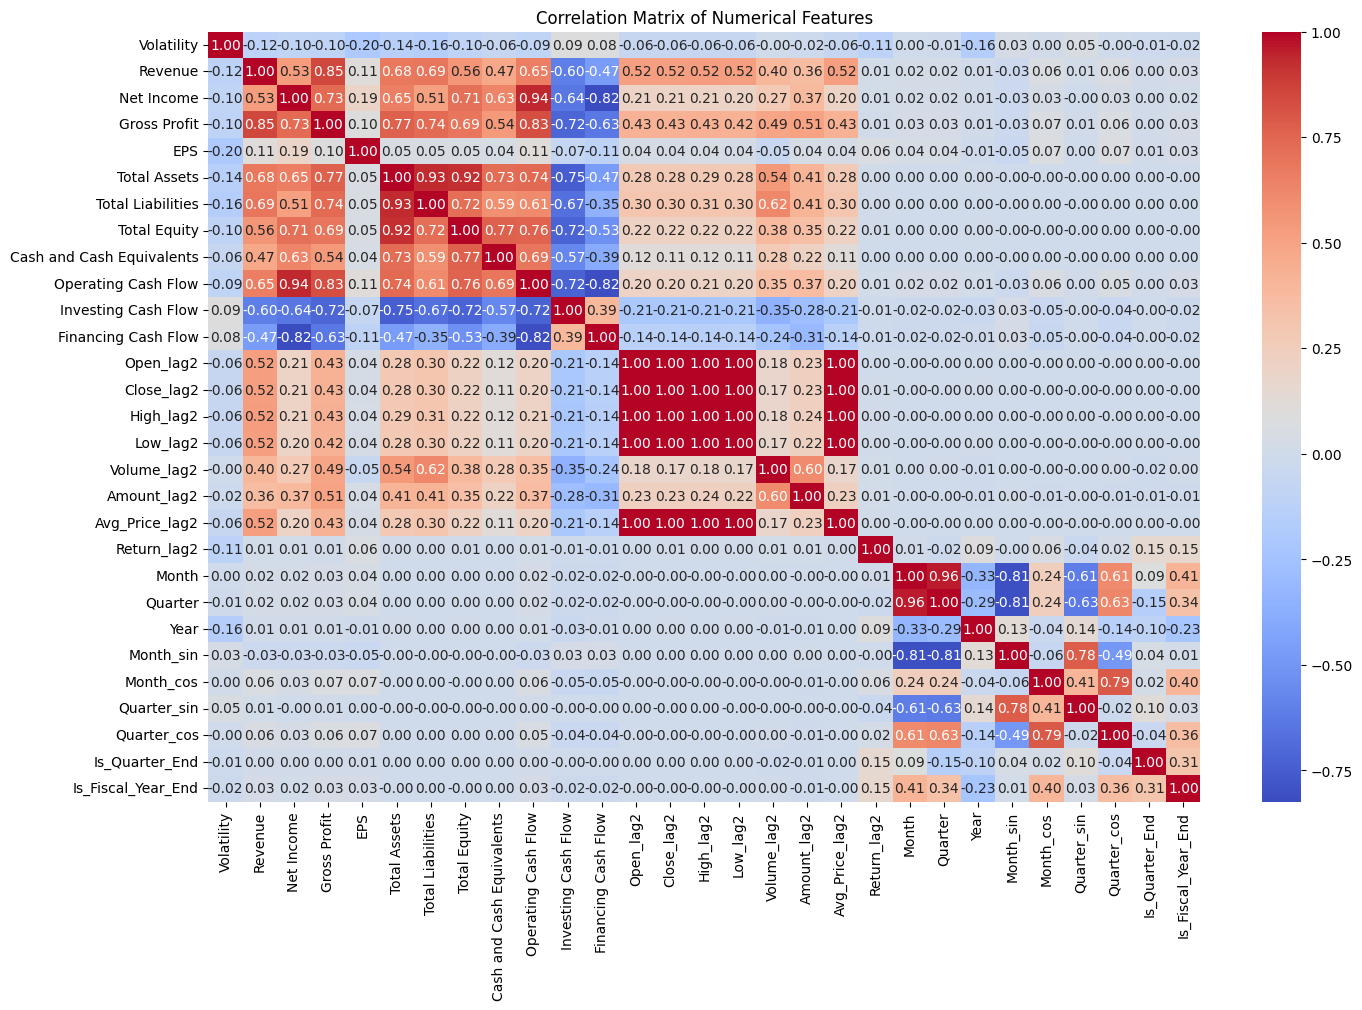

In [34]:
# Filter the DataFrame to include only numerical columns
numerical_data = data_selected.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

- Notice that some of the variables are highly correlated and would only skew our prediction result.


<div class="alert alert-block alert-info">
    
### 4.5. Adding Transformed Features <a class="anchor" name="transformed"></a>

- We will create new variables that are created by taking log transformations to unskew the data features forced by the high values.

In [35]:
# List of features for log transformation
log_transform_features = [
    'Revenue', 'Total Assets', 'Total Liabilities',
    'Amount_lag2', 'High_lag2', 'Low_lag2', 'Close_lag2', 'Open_lag2', 'Avg_Price_lag2'
]

# Applying log transformation to the selected features
for feature in log_transform_features:
    # Adding a small constant to avoid log(0) errors
    data_selected[f'{feature}_log'] = np.log1p(data_selected[feature])
    submission_data[f'{feature}_log'] = np.log1p(submission_data[feature])

- Now we will create some squared and cubic features to better evaluate the relationships of the variables and their impact on our label.

In [36]:
# List of features for squared and cubic transformation
squared_cubic_features = [
    'Return_lag2', 'EPS', 'Avg_Price_lag2', 'Open_lag2', 'Close_lag2',
    'High_lag2', 'Low_lag2'
]

# Applying squared and cubic transformations
for feature in squared_cubic_features:
    data_selected[f'{feature}_squared'] = np.square(data_selected[feature])
    data_selected[f'{feature}_cubed'] = np.power(data_selected[feature], 3)

    # Submission Set
    submission_data[f'{feature}_squared'] = np.square(submission_data[feature])
    submission_data[f'{feature}_cubed'] = np.power(submission_data[feature], 3)

# Display the first few rows to verify the new features
data_selected.head()

,Volatility,Revenue,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,...,Avg_Price_lag2_squared,Avg_Price_lag2_cubed,Open_lag2_squared,Open_lag2_cubed,Close_lag2_squared,Close_lag2_cubed,High_lag2_squared,High_lag2_cubed,Low_lag2_squared,Low_lag2_cubed
2,2.072637,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,...,22006.832409,3.264648e+06,27104.353956,4.462298e+06,21011.662116,3.045724e+06,27249.425476,4.498172e+06,18727.648801,2.562860e+06
3,2.113012,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,20149.145053,2.860124e+06,21363.914896,3.122635e+06,18494.368036,2.515123e+06,22720.738756,3.424788e+06,16562.145636,2.131449e+06
4,2.746538,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,19568.993142,2.737491e+06,18622.423296,2.541290e+06,19034.065296,2.626016e+06,21267.555556,3.101533e+06,17565.261156,2.327994e+06
5,2.168207,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,17653.772556,2.345613e+06,19547.954596,2.733078e+06,15653.512996,1.958474e+06,20427.269776,2.919547e+06,15149.671056,1.864682e+06
6,2.167925,4.999000e+09,886000000.0,2.710000e+09,2.95,1.048000e+10,5.393000e+09,5.091000e+09,1.071000e+09,864000000.0,...,16261.156084,2.073610e+06,15431.602176,1.916975e+06,17796.627216,2.374141e+06,18663.384996,2.549680e+06,14038.458256,1.663333e+06


In [37]:
len(data_selected)

12259

<div class="alert alert-block alert-warning"> 

## 5. Feature Selection and Model Evaluation  <a class="anchor" name="feature_sel"></a>

</div>

#### Top Performing Features

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# Identify categorical and numerical columns
categorical_cols = data_selected.select_dtypes(exclude=['number']).columns
numerical_cols = data_selected.select_dtypes(include=['number']).drop('Volatility', axis=1).columns

# Standardize the numerical columns
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(data_selected[numerical_cols])

# Debug: Print the shape of scaled numerical data
print(f"Shape of scaled numerical data: {numerical_scaled.shape}")

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(data_selected[categorical_cols]).toarray()  # Convert sparse to dense

# Debug: Print the shape of encoded categorical data
print(f"Shape of encoded categorical data: {categorical_encoded.shape}")

# Combine the scaled numerical and encoded categorical data
X_preprocessed = np.hstack([numerical_scaled, categorical_encoded])

# Debug: Check the final shape of preprocessed data
print(f"Shape of combined preprocessed data: {X_preprocessed.shape}")

# Get the feature names for the one-hot encoded columns
encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)
new_columns = list(numerical_cols) + list(encoded_cat_cols)

# Convert the combined array into a DataFrame with appropriate column names
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=new_columns)

# Add the 'Volatility' column back to the DataFrame for correlation computation
X_preprocessed_df['Volatility'] = data_selected['Volatility'].values

# Compute the correlation matrix
correlation_matrix = X_preprocessed_df.corr()

# Get top 10 correlations with 'Volatility'
top_10_correlations = correlation_matrix['Volatility'].abs().sort_values(ascending=False).head(10)

# Display the top 10 correlated features
print(top_10_correlations)


Shape of scaled numerical data: (12259, 51)
Shape of encoded categorical data: (12259, 619)
Shape of combined preprocessed data: (12259, 670)
Volatility                     1.000000
Low_lag2_log                   0.432791
Close_lag2_log                 0.425673
Avg_Price_lag2_log             0.422502
Open_lag2_log                  0.418746
High_lag2_log                  0.412641
Profitability_Category_Loss    0.406780
Revenue_log                    0.331457
Total Assets_log               0.303862
Company_Size_Small             0.290660
Name: Volatility, dtype: float64


#### Selected Models:

- Based on the correlation matrix, several features exhibit high multicollinearity. To address this, I will focus on models that penalize these dependencies, minimizing their influence on the overall model's performance.
- Given the presence of categorical variables that require one-hot encoding, the total number of features will exceed 600. Consequently, the models I’ve selected are tailored to handle high-dimensional datasets efficiently.

The models I will be evaluating are:

- Ridge Regression
- Lasso Regression
- Principal Component Analysis (PCA)


<div class="alert alert-block alert-info">
    
### 5.1. Ridge Regression <a class="anchor" name="ridge"></a>

<div class="alert alert-block alert-success">
    
#### 5.1.1.  Train-Test Split and Cross-Validation <a class="anchor" name="ridge_split"></a>
    
</div>

- First we will split the data into training and testing sets and then perform cross-validation within the training set to get the best alpha hyper parameter for ridge.

- Then we can use the test set to get our RMSE score.

- We will also use cross validation to get an estimated RMSE score.

In [39]:
# Split the data into training and testing sets
X = data_selected.drop('Volatility', axis=1)
y = data_selected['Volatility']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)


<div class="alert alert-block alert-success">
    
#### 5.1.2. Create the Pipeline with 10-Fold Cross-Validation <a class="ridge_pipeline" name="func"></a>
    
</div>

We will now create an ML pipeline that includes one-hot encoding, scaling, and Ridge Regression with cross-validation.



In [40]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Define a range of alphas (lambdas) to test
alphas = np.logspace(-2, 2, 100)

# Initialize a list to store RMSE for each alpha across all folds
rmse_scores = []

# Perform 10-fold cross-validation manually to compute RMSE for each alpha
for alpha in alphas:
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Create pipeline for each fold
        ridge_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('ridge', Ridge(alpha=alpha))
        ])
        
        # Fit the model
        ridge_pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate RMSE for the validation fold
        y_val_pred = ridge_pipeline.predict(X_val_fold)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))
    
    # Average RMSE for this alpha
    rmse_scores.append(np.mean(fold_rmse))

# Find the best alpha based on RMSE
best_alpha_ridge = alphas[np.argmin(rmse_scores)]
print(f"Best lambda (alpha) based on cross-validation: {best_alpha_ridge}")


Best lambda (alpha) based on cross-validation: 0.7924828983539177


<div class="alert alert-block alert-success">
    
#### 5.1.3.  Plot RMSE Against Lambda <a class="anchor" name="graph_ridge"></a>
    
</div>

We’ll plot the RMSE against different values of `lambda` to visualize the model performance.

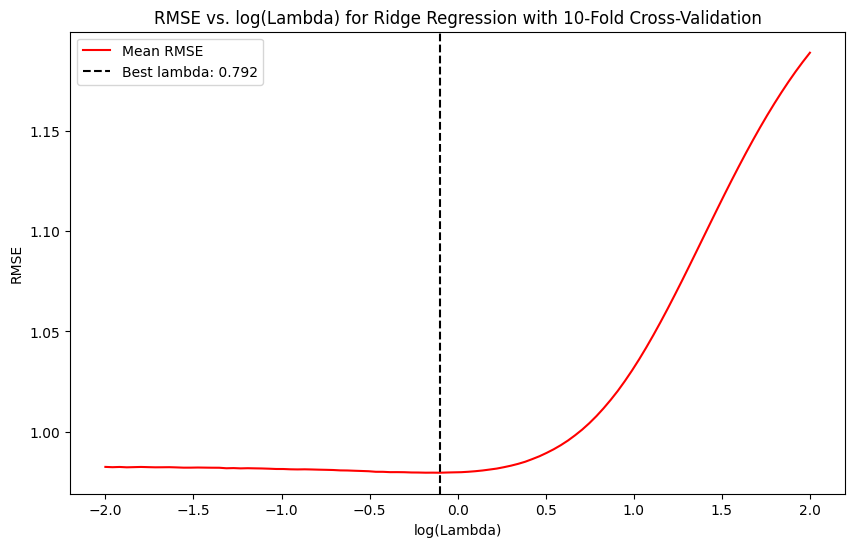

In [41]:
# Plot RMSE against the log of alphas
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), rmse_scores, color='red', label='Mean RMSE')
plt.axvline(np.log10(best_alpha_ridge), linestyle='--', color='black', label=f'Best lambda: {best_alpha_ridge:.3f}')
plt.xlabel('log(Lambda)')
plt.ylabel('RMSE')
plt.title('RMSE vs. log(Lambda) for Ridge Regression with 10-Fold Cross-Validation')
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
    
#### 5.1.4.  Evaluate the Final Model on the Test Data <a class="anchor" name="ridge_eval"></a>
    
</div>

Now, we’ll evaluate the final model using the best lambda on the test set.

In [42]:
# Create the final pipeline with the best alpha
final_ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=best_alpha_ridge))
])

# Fit the pipeline on the training data
final_ridge_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = final_ridge_pipeline.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.3f}")

Test RMSE: 1.022


- We can also use cross validation on the original dataset to get a mean RMSE score.

In [43]:
# Perform 10-fold cross-validation on the entire dataset to evaluate the final model
final_cv_scores = cross_val_score(final_ridge_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean RMSE across all folds
final_mean_rmse_ridge = np.mean(np.sqrt(-final_cv_scores))
print(f"Final Mean RMSE across 10 folds: {final_mean_rmse_ridge:.3f}")


Final Mean RMSE across 10 folds: 0.982


<div class="alert alert-block alert-success">
    
#### 5.1.5.  Feature Importance <a class="anchor" name="ridge_feature"></a>
    
</div>

We can still examine the most important features.

In [44]:
# Fit the final pipeline to the entire dataset
final_ridge_pipeline.fit(X, y)

# Get the feature names after one-hot encoding
feature_names = final_ridge_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract the coefficients from the trained Ridge model
coefficients = final_ridge_pipeline.named_steps['ridge'].coef_

# Combine feature names with their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficient
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display the total number of features
print(feature_importance.count())

# Display the most important features
print(feature_importance.head(10))

Feature        670
Coefficient    670
dtype: int64
             Feature  Coefficient
187  cat__Stock_CVNA     6.072094
139  cat__Stock_CDLX     4.122080
274   cat__Stock_GDS     2.938516
319  cat__Stock_IBRX     2.914898
607  cat__Stock_TWOU     2.803585
524  cat__Stock_SBLK    -2.784245
627  cat__Stock_VNET     2.699394
373  cat__Stock_LPSN     2.552104
167  cat__Stock_CPLP    -2.347488
589  cat__Stock_TPIC     2.340210


Notice that the total features are pretty high, i.e., `670`. This is not ideal as the dimensionality of the model is quite high and our dataset is not as large.

The top features include different dummy variables for our `Stock` parameter, as one can imagine that different trends may prevail in different kind of stocks.


<div class="alert alert-block alert-info">
    
### 5.2. Lasso Regression <a class="anchor" name="lasso"></a>

- First we will split the data into training and testing sets and then perform cross-validation within the training set to get the best alpha hyper parameter for lasso.

- Then we can use the test set to get our RMSE score.

- We will also use cross validation to get an estimated RMSE score.

<div class="alert alert-block alert-success">
    
#### 5.2.1.  Train-Test Split and Cross-Validation <a class="anchor" name="ridge_split"></a>
    
</div>

In [46]:
# Split the data into training and testing sets
X = data_selected.drop('Volatility', axis=1)
y = data_selected['Volatility']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

<div class="alert alert-block alert-success">
    
#### 5.2.2.  Set Up the Pipeline <a class="anchor" name="lasso_pipeline"></a>
    
</div>

To get the best estimate for alpha, I will be using a mixture of expert search and random cross validation search. 

I will be finding the trend of RMSE over a range of logspace `-2` to `1`. And then by knowing the trend I will estimate the best alpha value. My point of search will be to check how the dimensions of the model vary against the RMSE across different alpha values. 

P.S I did try to search for the best lamba by considering a wide range of alpha values but the code on my laptop kept on running for more than 10 hours, hence I decided to use expert search aswell. 

In [48]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Define a range of alphas (lambdas) to test
alphas = np.logspace(-2, 1, 100)

# Initialize a list to store RMSE for each alpha across all folds
rmse_scores = []

# Initialize KFold with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 10-fold cross-validation manually to compute RMSE for each alpha
for alpha in alphas:
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Create pipeline for each fold
        lasso_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('lasso', Lasso(alpha=alpha, max_iter=10000))
        ])
        
        # Fit the model
        lasso_pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate RMSE for the validation fold
        y_val_pred = lasso_pipeline.predict(X_val_fold)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))
    
    # Average RMSE for this alpha
    rmse_scores.append(np.mean(fold_rmse))

# Find the best alpha based on RMSE
best_alpha_lasso = alphas[np.argmin(rmse_scores)]
print(f"Best lambda (alpha) based on cross-validation: {best_alpha_lasso}")


Best lambda (alpha) based on cross-validation: 0.01


<div class="alert alert-block alert-success">
    
#### 5.2.3.  Plot RMSE Against Lambda <a class="anchor" name="lasso_graph"></a>
    
</div>

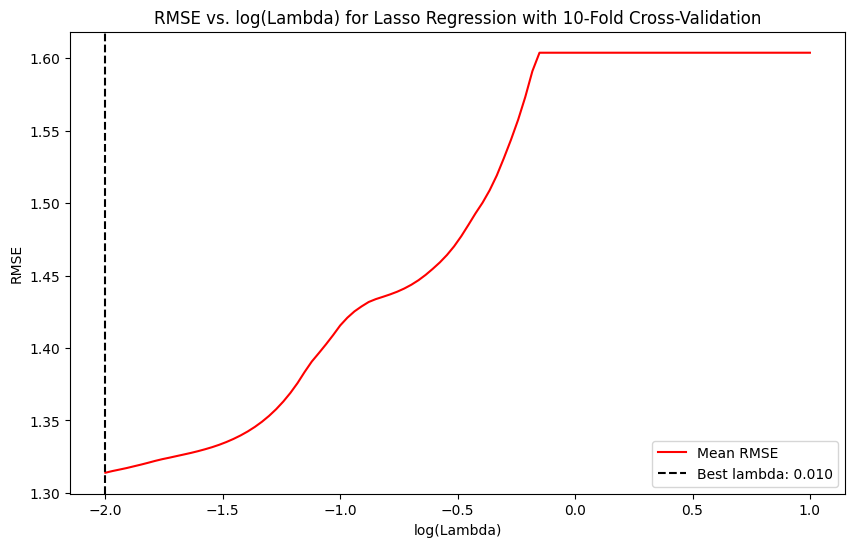

In [49]:
# Plot RMSE against the log of alphas
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), rmse_scores, color='red', label='Mean RMSE')
plt.axvline(np.log10(best_alpha_lasso), linestyle='--', color='black', label=f'Best lambda: {best_alpha_lasso:.3f}')
plt.xlabel('log(Lambda)')
plt.ylabel('RMSE')
plt.title('RMSE vs. log(Lambda) for Lasso Regression with 10-Fold Cross-Validation')
plt.legend()
plt.show()

The trend clearly shows that the rmse is decreasing for decreasing alpha parameter. Now I will be testing on different values of alpha such that I have suffiecient model variables and a good RMSE, using the test set and cross validation.

<div class="alert alert-block alert-success">
    
#### 5.2.4.  Evaluate the Final Model on the Test Data <a class="anchor" name="lasso_eval"></a>
    
</div>

In [73]:
# Function to evaluate the model
def lasso_reg(alpha):
    # Create the final pipeline with the best alpha
    final_lasso_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))
    ])

    # Fit the final pipeline to the training data
    final_lasso_pipeline.fit(X, y)

    # Predict on the test set
    y_pred = final_lasso_pipeline.predict(X_test)

    # Calculate RMSE on the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test RMSE: {test_rmse:.3f}")

    # Perform 10-fold cross-validation on the entire dataset to evaluate the final model
    final_cv_scores = cross_val_score(final_lasso_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

    # Compute the mean RMSE across all folds
    final_mean_rmse_lasso = np.mean(np.sqrt(-final_cv_scores))
    print(f"Final Mean RMSE across 10 folds: {final_mean_rmse_lasso:.3f}")

    # Get the feature names after one-hot encoding
    feature_names = final_lasso_pipeline.named_steps['preprocessor'].get_feature_names_out()

    # Extract the coefficients from the trained Lasso model
    coefficients = final_lasso_pipeline.named_steps['lasso'].coef_

    # Combine feature names with their coefficients into a DataFrame
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Sort by absolute value of coefficient and reset the index
    feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

    # Reset the index to have a clean, sorted index
    feature_importance = feature_importance.reset_index(drop=True)

    # Display the most important features
    print(feature_importance[feature_importance['Coefficient'] != 0])  # Features with non-zero coefficients

In [74]:
# Evaluating on alpha = 0.0008
lasso_reg(0.0008)

Test RMSE: 1.063
Final Mean RMSE across 10 folds: 1.116
                      Feature  Coefficient
0           num__Low_lag1_log   -10.203483
1          num__High_lag1_log     9.547019
2             cat__Stock_CVNA     3.943106
3             cat__Stock_CDLX     2.630489
4             cat__Stock_VNET     2.389383
..                        ...          ...
260            cat__Stock_WKC     0.003865
261  num__Financing Cash Flow     0.003798
262             cat__Stock_FC    -0.003615
263             cat__Stock_PH     0.003347
264            cat__Stock_PKG    -0.000480

[265 rows x 2 columns]


In [75]:
# Evaluating on alpha = 0.0008
lasso_reg(0.0007)

Test RMSE: 1.049
Final Mean RMSE across 10 folds: 1.105
                    Feature  Coefficient
0         num__Low_lag1_log    -9.853771
1        num__High_lag1_log     9.203374
2           cat__Stock_CVNA     4.117478
3           cat__Stock_CDLX     2.763859
4           cat__Stock_VNET     2.488727
..                      ...          ...
315         cat__Stock_TVTX     0.003905
316         cat__Stock_SMPL    -0.003288
317          cat__Stock_GVA    -0.003171
318  num__Return_lag1_cubed    -0.002939
319         cat__Stock_IZEA     0.000056

[320 rows x 2 columns]


In [79]:
# Evaluating on alpha = 0.0006
lasso_reg(0.0006)

Test RMSE: 1.034
Final Mean RMSE across 10 folds: 1.093
                Feature  Coefficient
0     num__Low_lag1_log    -9.528572
1    num__High_lag1_log     8.443379
2       cat__Stock_CVNA     4.325406
3       cat__Stock_CDLX     2.914738
4       cat__Stock_VNET     2.592683
..                  ...          ...
363     cat__Stock_DSGX    -0.002786
364       cat__Stock_BJ    -0.002584
365      cat__Stock_SRE    -0.001888
366      cat__Stock_NJR    -0.001160
367     cat__Stock_CMCO    -0.000817

[368 rows x 2 columns]


In [77]:
# Evaluating on alpha = 0.0005
lasso_reg(0.0005)

Test RMSE: 1.018
Final Mean RMSE across 10 folds: 1.080
                    Feature  Coefficient
0         num__Low_lag1_log    -9.100006
1        num__High_lag1_log     7.241550
2           cat__Stock_CVNA     4.577800
3           cat__Stock_CDLX     3.090691
4           cat__Stock_VNET     2.715280
..                      ...          ...
412        num__Volume_lag1     0.007315
413         cat__Stock_SLGN    -0.006872
414           cat__Stock_DY     0.004089
415  num__Return_lag1_cubed    -0.000904
416         num__Net Income     0.000740

[417 rows x 2 columns]


In [78]:
# Evaluating on alpha = 0.0008
lasso_reg(0.0004)

Test RMSE: 1.002
Final Mean RMSE across 10 folds: 1.067
                    Feature  Coefficient
0         num__Low_lag1_log    -8.517820
1        num__High_lag1_log     5.921353
2           cat__Stock_CVNA     4.859630
3           cat__Stock_CDLX     3.281444
4           cat__Stock_VNET     2.843342
..                      ...          ...
453        num__Volume_lag1     0.007689
454  num__Return_lag1_cubed    -0.004310
455         num__Net Income     0.003107
456         cat__Stock_CVLG     0.002422
457         cat__Stock_NXPI     0.000567

[458 rows x 2 columns]


In [85]:
# Create the final pipeline with the best alpha
final_lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.0005, max_iter=10000))
])

# Fit the final pipeline to the training data
final_lasso_pipeline.fit(X, y)

# Predict on the test set
y_pred = final_lasso_pipeline.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.3f}")

# Perform 10-fold cross-validation on the entire dataset to evaluate the final model
final_cv_scores = cross_val_score(final_lasso_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean RMSE across all folds
final_mean_rmse_lasso = np.mean(np.sqrt(-final_cv_scores))
print(f"Final Mean RMSE across 10 folds: {final_mean_rmse_lasso:.3f}")

# Get the feature names after one-hot encoding
feature_names = final_lasso_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract the coefficients from the trained Lasso model
coefficients = final_lasso_pipeline.named_steps['lasso'].coef_

# Combine feature names with their coefficients into a DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficient and reset the index
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Reset the index to have a clean, sorted index
feature_importance = feature_importance.reset_index(drop=True)

# Display the most important features
print(feature_importance[feature_importance['Coefficient'] != 0])  # Features with non-zero coefficients


<div class="alert alert-block alert-info">
    
### 6.3. Principal Component Analysis PCA <a class="anchor" name="lasso"></a>

<div class="alert alert-block alert-success">
    
#### 6.3.1.  Set Up the Pipeline with PCA and Linear Regression <a class="anchor" name="func"></a>
    
</div>

In [80]:
# Assuming data_selected is your DataFrame and Volatility is the target variable
X = data_selected.drop('Volatility', axis=1)
y = data_selected['Volatility']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(exclude=['number']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    sparse_threshold=0  # Ensures output is dense
)

# Transform the entire dataset once using the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store RMSE for each number of components
rmse_scores = []

# Perform cross-validation to compute RMSE for each number of components
num_components_list = range(1, 300) 

for num_components in num_components_list:
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_transformed):
        X_train_fold, X_val_fold = X_transformed[train_idx], X_transformed[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Apply PCA and Linear Regression only within the loop
        pca = PCA(n_components=num_components)
        X_train_pca = pca.fit_transform(X_train_fold)
        X_val_pca = pca.transform(X_val_fold)
        
        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train_pca, y_train_fold)
        
        # Predict and calculate RMSE for the validation fold
        y_val_pred = model.predict(X_val_pca)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))
    
    # Average RMSE for this number of components
    rmse_scores.append(np.mean(fold_rmse))

# Find the best number of components based on RMSE
best_num_components = num_components_list[np.argmin(rmse_scores)]
print(f"Best number of components based on cross-validation: {best_num_components}")


KeyboardInterrupt: 

<div class="alert alert-block alert-success">
    
#### 6.3.2.  Plot RMSE against Number of Components <a class="anchor" name="func"></a>
    
</div>

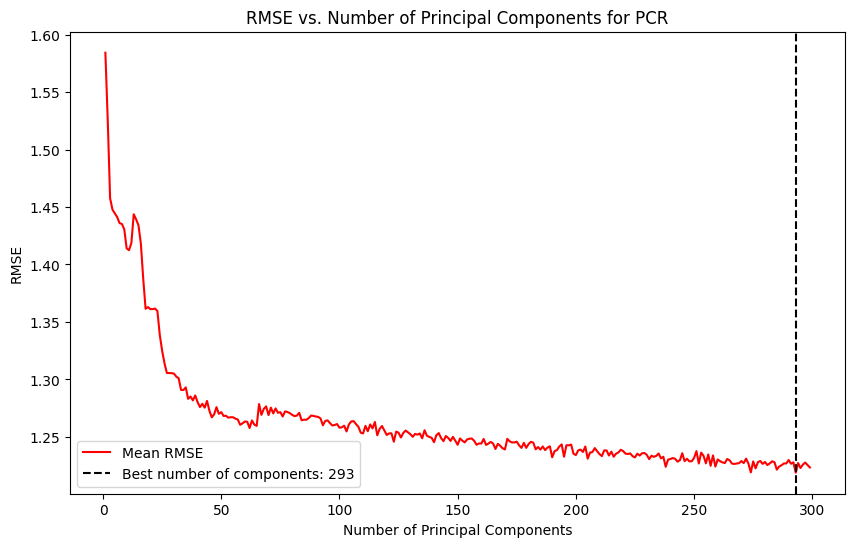

In [ ]:
# Plot RMSE against the number of components
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, rmse_scores, color='red', label='Mean RMSE')
plt.axvline(best_num_components, linestyle='--', color='black', label=f'Best number of components: {best_num_components}')
plt.xlabel('Number of Principal Components')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Principal Components for PCR')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    
#### 6.3.3.  Evaluate the Final Model on the Test Data <a class="anchor" name="func"></a>
    
</div>

In [81]:
# Create the final pipeline with the best number of components
final_pcr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=293)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
final_pcr_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = final_pcr_pipeline.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.3f}")

Test RMSE: 1.152


In [82]:
# Perform 10-fold cross-validation on the entire dataset to evaluate the final model
final_cv_scores = cross_val_score(final_pcr_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean RMSE across all folds
final_mean_rmse_pcr = np.mean(np.sqrt(-final_cv_scores))
print(f"Final Mean RMSE across 10 folds: {final_mean_rmse_pcr:.3f}")

Final Mean RMSE across 10 folds: 1.179


<div class="alert alert-block alert-success">
    
#### 6.3.4.  Examine the Explained Variance by Components <a class="anchor" name="func"></a>
    
</div>

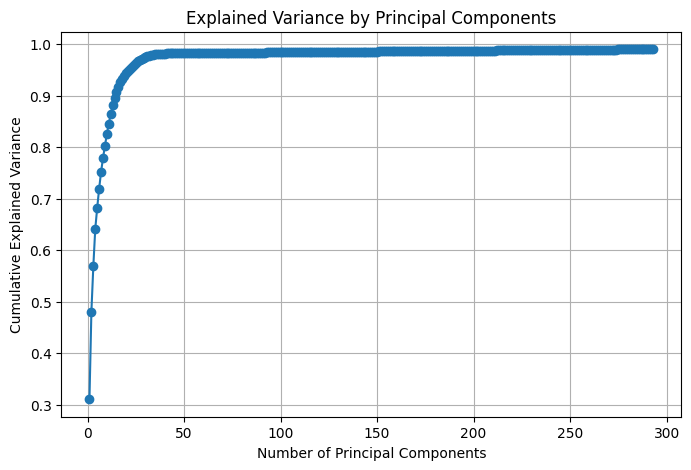

Cumulative explained variance with 293 components: 0.99


In [84]:
# Fit PCA on the entire training set to extract explained variance
pca = PCA(n_components=293)
X_train_transformed = pca.fit_transform(preprocessor.fit_transform(X_train))

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 293 + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

print(f"Cumulative explained variance with {293} components: {explained_variance[-1]:.2f}")


<div class="alert alert-block alert-warning"> 

## 7. Evaluating The Models  <a class="anchor" name="feature_ext"></a>

</div>

In this task, we developed and evaluated three machine learning models: Ridge Regression, Lasso Regression, and Principal Component Regression (PCR). The goal was to predict stock volatility, a crucial aspect in financial risk assessment. Below is an in-depth statistical comparison of the models, focusing on their accuracy, performance, advantages, and disadvantages in the context of the task.


<div class="alert alert-block alert-info">
    
### 7.1. Accuracy Evaluation Using RMSE <a class="anchor" name="lasso"></a>

`RMSE` (Root Mean Squared Error) is a widely used metric in regression models to assess predictive accuracy. It measures the average magnitude of the errors between predicted and actual values. Lower RMSE indicates better performance.

- Ridge Regression RMSE: 1.038

- Lasso Regression RMSE: 1.093

- PCR RMSE: 1.225

In [ ]:
# Create a DataFrame with RMSE values
rmse_data = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'PCR'],
    'RMSE': [final_mean_rmse_ridge, final_mean_rmse_lasso, final_mean_rmse_pcr]
})

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='RMSE', data=rmse_data)

# Set plot title and labels
plt.title('RMSE Comparison Between Ridge, Lasso, and PCR', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

# Show the plot
plt.show()

To conclude, ridge provides the best RMSE which is slightly higher than Lasso, while pcr gives a lower RMSE score.


<div class="alert alert-block alert-info">
    
### 7.2. Statistical Comparison of the Models <a class="anchor" name="lasso"></a>

### Ridge Regression

#### Advantages:

`Handles multicollinearity`: Ridge penalizes large coefficients, which is useful for high-dimensional datasets like ours where features may be highly correlated.

`Improves generalization`: The regularization reduces overfitting by shrinking the coefficients, leading to better generalization across the 10 folds of cross-validation.

`Best RMSE`: The lowest RMSE of 1.038 indicates it is the best model in terms of predictive performance.

#### Disadvantages:

`No feature selection`: Ridge does not reduce the number of features, leading to a model with 638 features, which may not be ideal for interpretability. This could result in a complex model that is harder to understand and explain.

`Overfitting risk`: Although regularization helps reduce overfitting, retaining a large number of features could still increase model complexity and the risk of overfitting.

### Lasso Regression

#### Advantages:

`Feature selection`: Lasso performs automatic feature selection by setting some coefficients to zero, resulting in a simpler model with only 368 features (compared to Ridge's 638). This reduces model complexity and enhances interpretability.

`Sparse model`: By retaining fewer features, Lasso produces a sparse model, which is particularly useful in financial data, where only a subset of features may drive stock volatility.

`Trade-off between accuracy and complexity`: While Lasso's RMSE of 1.093 is slightly higher than Ridge's, the reduction in the number of features makes it a better alternative when simplicity and interpretability are valued.

#### Disadvantages:

`Less accurate than Ridge`: The RMSE is higher than Ridge, which suggests that it may not capture the full complexity of the data as effectively.

### Principal Component Regression (PCR)

#### Advantages:

`Dimensionality reduction`: PCR reduces the dataset to 293 components, which can help to simplify the model and remove noise from the data. It can be useful when the dataset contains highly correlated features, as it focuses on explaining variance.

`Avoids overfitting by reducing dimensionality`: The reduction in the number of components helps mitigate overfitting, especially in datasets with multicollinearity, by removing redundancy in the feature space.

#### Disadvantages:

`Lower accuracy`: The RMSE of 1.225 indicates that PCR is the least accurate model among the three. While it reduces the dimensionality, it may discard useful information that is important for predicting volatility, leading to weaker performance.

`Interpretability issues`: Since PCR relies on principal components rather than the original features, it is more challenging to interpret the impact of individual features on stock volatility. This can be problematic in financial contexts, where understanding the relationship between predictors and the target is important.

`Does not directly account for the target variable`: PCR focuses on maximizing variance in the predictor variables, without considering the target variable (volatility). This contrasts with Ridge and Lasso, which directly optimize the relationship between predictors and the target.


<div class="alert alert-block alert-info">
    
### 7.3. Conclusion <a class="anchor" name="lasso"></a>

RMSE: Ridge and Lasso Regressions offer the performance in terms of RMSE which is significantly lower than PCR's. The difference between the RMSE of ridge and lasso is insubstantial and we need to look at other factors to select the best model.

Best Model for avoiding overfitting: Lasso Regression offers a simpler model with fewer features (368 vs. 638 in Ridge), making it easier to interpret and avoid overfitting of the data as the dataset includes some features that are exteremly correlated.

Recommendation: For this specific task of predicting stock volatility, where accuracy is crucial, `Ridge Regression` is the best choice due to its superior performance, good intrepretability, and consideration of noise and overfitting.